In [1]:
### import packages

## lets basic import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.utils import shuffle

from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score

# from pandas_profiling import ProfileReport

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost.sklearn import XGBClassifier

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [2]:
## import data

df = pd.read_csv('Disease_Dataset/dataset.csv')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = shuffle(df, random_state = 41)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
941,Cervical spondylosis,back_pain,weakness_in_limbs,neck_pain,dizziness,loss_of_balance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1715,Diabetes,fatigue,weight_loss,restlessness,irregular_sugar_level,blurred_and_distorted_vision,obesity,excessive_hunger,increased_appetite,polyuria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1377,Jaundice,itching,vomiting,fatigue,weight_loss,high_fever,dark_urine,abdominal_pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1479,Alcoholic hepatitis,vomiting,yellowish_skin,abdominal_pain,swelling_of_stomach,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3483,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
## remove ('_') underscore in the text

for col in df.columns:
    df[col] = df[col].str.replace('_', ' ')
    
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
941,Cervical spondylosis,back pain,weakness in limbs,neck pain,dizziness,loss of balance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1715,Diabetes,fatigue,weight loss,restlessness,irregular sugar level,blurred and distorted vision,obesity,excessive hunger,increased appetite,polyuria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1377,Jaundice,itching,vomiting,fatigue,weight loss,high fever,dark urine,abdominal pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1479,Alcoholic hepatitis,vomiting,yellowish skin,abdominal pain,swelling of stomach,distention of abdomen,history of alcohol consumption,fluid overload,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3483,Psoriasis,skin rash,joint pain,skin peeling,silver like dusting,small dents in nails,inflammatory nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Drug Reaction,vomiting,vomiting,fatigue,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,abnormal menstruation,chest pain,chest pain,loss of smell,muscle pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [6]:
## check null values

null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


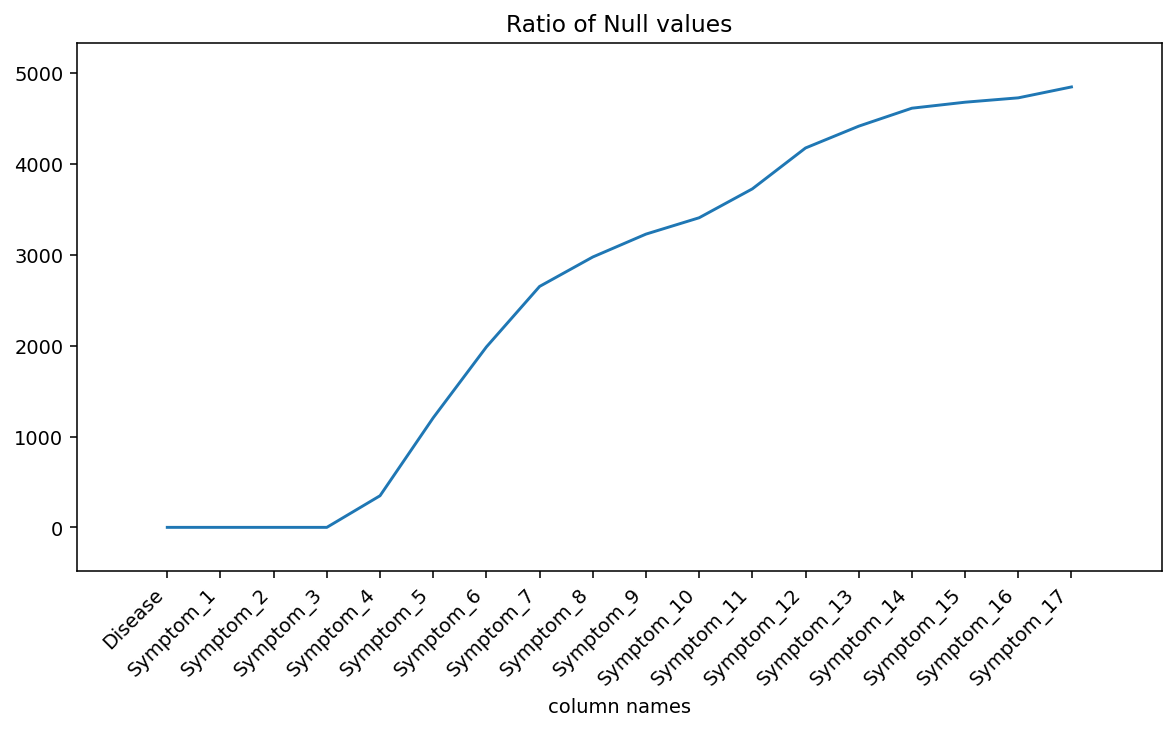

In [7]:
## plot of null value

plt.figure(figsize=(10, 5), dpi=140)
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation = 45, horizontalalignment = 'right')
plt.title('Ratio of Null values')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

In [8]:
cols = df.columns

data = df[cols].values.flatten()

reshaped = pd.Series(data)
reshaped = reshaped.str.strip()
reshaped = reshaped.values.reshape(df.shape)

df = pd.DataFrame(reshaped, columns = df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Cervical spondylosis,back pain,weakness in limbs,neck pain,dizziness,loss of balance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Diabetes,fatigue,weight loss,restlessness,irregular sugar level,blurred and distorted vision,obesity,excessive hunger,increased appetite,polyuria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Jaundice,itching,vomiting,fatigue,weight loss,high fever,dark urine,abdominal pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alcoholic hepatitis,vomiting,yellowish skin,abdominal pain,swelling of stomach,distention of abdomen,history of alcohol consumption,fluid overload,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Psoriasis,skin rash,joint pain,skin peeling,silver like dusting,small dents in nails,inflammatory nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
## lets fill nan values

df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Cervical spondylosis,back pain,weakness in limbs,neck pain,dizziness,loss of balance,0,0,0,0,0,0,0,0,0,0,0,0
1,Diabetes,fatigue,weight loss,restlessness,irregular sugar level,blurred and distorted vision,obesity,excessive hunger,increased appetite,polyuria,0,0,0,0,0,0,0,0
2,Jaundice,itching,vomiting,fatigue,weight loss,high fever,dark urine,abdominal pain,0,0,0,0,0,0,0,0,0,0
3,Alcoholic hepatitis,vomiting,yellowish skin,abdominal pain,swelling of stomach,distention of abdomen,history of alcohol consumption,fluid overload,0,0,0,0,0,0,0,0,0,0
4,Psoriasis,skin rash,joint pain,skin peeling,silver like dusting,small dents in nails,inflammatory nails,0,0,0,0,0,0,0,0,0,0,0


In [10]:
## lets explore symptom severity

df_severity = pd.read_csv('Disease_Dataset/Symptom-severity.csv')
df_severity['Symptom'] = df_severity['Symptom'].str.replace('_',' ')
df_severity.head(10)

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5
5,chills,3
6,joint pain,3
7,stomach pain,5
8,acidity,3
9,ulcers on tongue,4


In [11]:
## overall list

df_severity['Symptom'].unique()

array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

In [12]:
## encode sysptoms in the data

vals = df.values
symptoms = df_severity['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df_severity[df_severity['Symptom'] == symptoms[i]]['weight'].values[0]

In [13]:
df_processed = pd.DataFrame(vals, columns=cols)
df_processed.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Cervical spondylosis,3,7,5,4,4,0,0,0,0,0,0,0,0,0,0,0,0
1,Diabetes,4,3,5,5,5,4,4,5,4,0,0,0,0,0,0,0,0
2,Jaundice,1,5,4,3,7,4,4,0,0,0,0,0,0,0,0,0,0
3,Alcoholic hepatitis,5,3,4,7,4,5,6,0,0,0,0,0,0,0,0,0,0
4,Psoriasis,3,3,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0


In [14]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4920 non-null   object
 5   Symptom_5   4920 non-null   object
 6   Symptom_6   4920 non-null   object
 7   Symptom_7   4920 non-null   object
 8   Symptom_8   4920 non-null   object
 9   Symptom_9   4920 non-null   object
 10  Symptom_10  4920 non-null   object
 11  Symptom_11  4920 non-null   object
 12  Symptom_12  4920 non-null   object
 13  Symptom_13  4920 non-null   object
 14  Symptom_14  4920 non-null   object
 15  Symptom_15  4920 non-null   object
 16  Symptom_16  4920 non-null   object
 17  Symptom_17  4920 non-null   object
dtypes: object(18)
memory usage: 692.0+ KB


In [15]:
## assign symptoms with no rank to zero

df_processed = df_processed.replace('dischromic  patches', 0)
df_processed = df_processed.replace('spotting  urination', 0)
df_processed = df_processed.replace('foul smell of urine', 0)

In [16]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   int64 
 2   Symptom_2   4920 non-null   int64 
 3   Symptom_3   4920 non-null   int64 
 4   Symptom_4   4920 non-null   int64 
 5   Symptom_5   4920 non-null   int64 
 6   Symptom_6   4920 non-null   int64 
 7   Symptom_7   4920 non-null   int64 
 8   Symptom_8   4920 non-null   int64 
 9   Symptom_9   4920 non-null   int64 
 10  Symptom_10  4920 non-null   int64 
 11  Symptom_11  4920 non-null   int64 
 12  Symptom_12  4920 non-null   int64 
 13  Symptom_13  4920 non-null   int64 
 14  Symptom_14  4920 non-null   int64 
 15  Symptom_15  4920 non-null   int64 
 16  Symptom_16  4920 non-null   int64 
 17  Symptom_17  4920 non-null   int64 
dtypes: int64(17), object(1)
memory usage: 692.0+ KB


In [17]:
## split data
data = df_processed.iloc[:,1:].values
labels = df['Disease'].values
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=41)

In [18]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3936, 17) (984, 17) (3936,) (984,)


In [19]:
def performance_evaluator(model, X_test, y_test):
    """
    model: Load the trained model
    X_test: test data
    y_test: Actual value
    
    """
    
    y_predicted = model.predict(X_test)
    
    precision = precision_score(y_test, y_predicted,average='micro')*100
    
    accuracy = accuracy_score(y_test, y_predicted)*100
    
    f1 = f1_score(y_test, y_predicted, average='macro')*100
    
    recall = recall_score(y_test, y_predicted, average='macro')*100
    
    print('precision----->', precision) 
    print('\n************************')
    print('Accuracy----->', accuracy)
    print('\n************************')
    print('F1 Score----->', f1)
    print('\n************************')
    print('Recall----->', recall)
    print('\n************************')
    return accuracy, precision, f1, recall

In [20]:
## plot classification metrix 

def confusion_plot(model, X_test, y_test):
    """
    to plot confusion metrix
    """
    plt.figure(figsize=(10, 10), dpi=150)
    
    y_pred = model.predict(X_test)
    con_me = confusion_matrix(y_test, y_pred)
    sns.heatmap(con_me, annot=True)

## Support vector machine

In [21]:
SVM_init = SVC()
model_SVM_init = SVM_init.fit(X_train, y_train)
_1, _2, _3, _4 = performance_evaluator(model_SVM_init, X_test, y_test)

precision-----> 94.0040650406504

************************
Accuracy-----> 94.0040650406504

************************
F1 Score-----> 93.36903990654748

************************
Recall-----> 93.8134172100238

************************


In [24]:
## support Vector machine Hyperparameter tuned

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.966 total time=   0.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   0.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.963 total time=   0.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.977 total time=   0.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.968 total time=   0.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.921 total time=   0.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.928 total time=   0.6s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.917 total time=   0.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.7s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.925 total time=   0.6s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.725 total time=   1.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.994 total time=   0.1s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.995 total time=   0.1s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.996 total time=   0.1s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.994 total time=   0.1s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.992 total time=   0.1s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.994 total time=   0.1s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.995 total time=   0.1s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.996 total time=   0.1s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.994 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.992 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.994 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.995 total time=   0.1s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [25]:
print(grid.best_estimator_)
print(grid.best_params_)

SVC(C=1, gamma=1)
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [26]:
hyper_tuned_svc = SVC(C= 10, gamma= 0.1, kernel= 'rbf')
hyper_tuned_svc.fit(X_train, y_train)

## lets calculate performance
_1, _2, _3, _4 = performance_evaluator(hyper_tuned_svc, X_test, y_test)

precision-----> 99.59349593495935

************************
Accuracy-----> 99.59349593495935

************************
F1 Score-----> 99.584946551886

************************
Recall-----> 99.56333215506069

************************


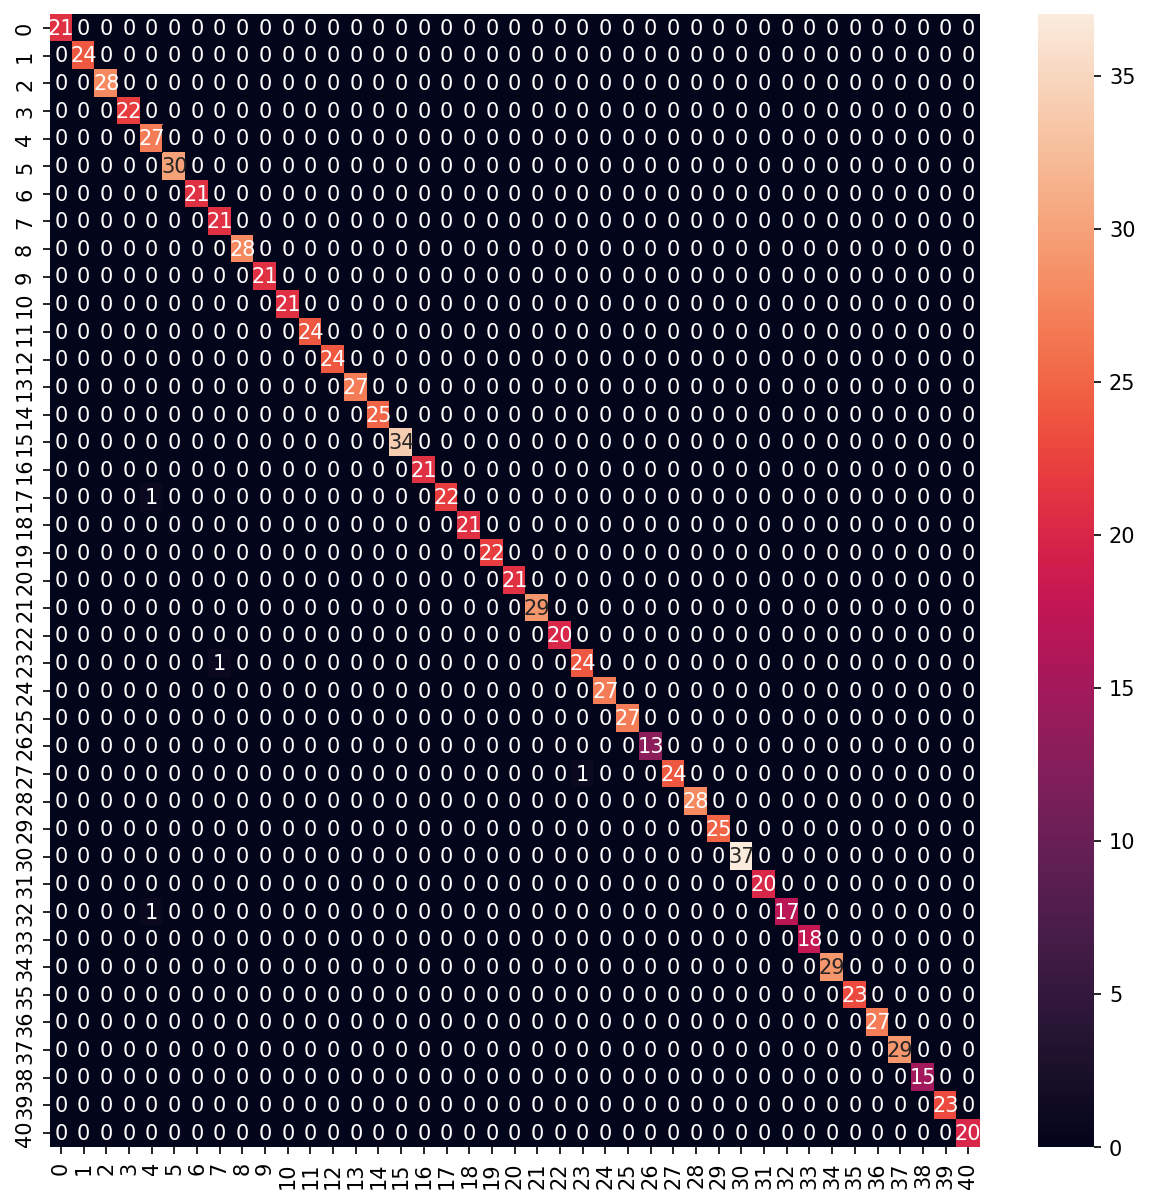

In [28]:
confusion_plot(hyper_tuned_svc, X_test, y_test)